## IMPORTING LIBRARIES

In [47]:
!pip install seaborn

     ---------------------------------------- 14.9/14.9 MB 5.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Dhayanithi\\anaconda3\\Lib\\site-packages\\~~mpy\\.libs\\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [ ]:
!pip install matplotlib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
dataset_1 = arff.loadarff('1year.arff')
dataset_2 = arff.loadarff('2year.arff')
dataset_3 = arff.loadarff('3year.arff')
dataset_4 = arff.loadarff('4year.arff')
dataset_5 = arff.loadarff('5year.arff')

In [5]:
df1 = pd.DataFrame(dataset_1[0])
df2 = pd.DataFrame(dataset_2[0])
df3 = pd.DataFrame(dataset_3[0])
df4 = pd.DataFrame(dataset_4[0])
df5 = pd.DataFrame(dataset_5[0])

In [6]:
df_train = pd.concat([df1,df2,df3,df4,df5],axis = 0)

In [7]:
print("{0} Rows and {1} columns for Training dataset".format(df_train.shape[0],df_train.shape[1]))

43405 Rows and 65 columns for Training dataset


In [8]:
df_train.columns

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64',
       'class'],
      dtype='object')

In [9]:
#Checking the Datatype of the features
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43405 entries, 0 to 5909
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   43397 non-null  float64
 1   Attr2   43397 non-null  float64
 2   Attr3   43397 non-null  float64
 3   Attr4   43271 non-null  float64
 4   Attr5   43316 non-null  float64
 5   Attr6   43397 non-null  float64
 6   Attr7   43397 non-null  float64
 7   Attr8   43311 non-null  float64
 8   Attr9   43396 non-null  float64
 9   Attr10  43397 non-null  float64
 10  Attr11  43361 non-null  float64
 11  Attr12  43271 non-null  float64
 12  Attr13  43278 non-null  float64
 13  Attr14  43397 non-null  float64
 14  Attr15  43369 non-null  float64
 15  Attr16  43310 non-null  float64
 16  Attr17  43311 non-null  float64
 17  Attr18  43397 non-null  float64
 18  Attr19  43277 non-null  float64
 19  Attr20  43278 non-null  float64
 20  Attr21  37551 non-null  float64
 21  Attr22  43397 non-null  float64
 22  Attr

# Data Preprocessing

In [10]:
#Checking the unique values in the Class-Feature
df_train['class'].unique()

array([b'0', b'1'], dtype=object)

In [11]:
df_train['class'].value_counts()

class
b'0'    41314
b'1'     2091
Name: count, dtype: int64

In [12]:
#Imputing class labels of train and test into Int type
from sklearn.preprocessing import LabelEncoder

In [13]:
label_encoder = LabelEncoder()

In [14]:
df_train['class']= label_encoder.fit_transform(df_train['class'])

In [15]:
df_train['class'].unique()

array([0, 1])

In [16]:
df_train['class'].value_counts()

class
0    41314
1     2091
Name: count, dtype: int64

## MICE imputation (Multivariate Imputation using Chained Equation)

It appears that there's no MICE attribute in the fancyimpute module. If you want to perform Multiple Imputation by Chained Equations (MICE), you can use the IterativeImputer class from the sklearn.impute module. 

In [17]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
mice_imputer = IterativeImputer(max_iter=10, imputation_order='random')
mice_imputed_dataset = mice_imputer.fit_transform(df_train)
df = pd.DataFrame(data=mice_imputed_dataset, columns=df_train.columns)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   43405 non-null  float64
 1   Attr2   43405 non-null  float64
 2   Attr3   43405 non-null  float64
 3   Attr4   43405 non-null  float64
 4   Attr5   43405 non-null  float64
 5   Attr6   43405 non-null  float64
 6   Attr7   43405 non-null  float64
 7   Attr8   43405 non-null  float64
 8   Attr9   43405 non-null  float64
 9   Attr10  43405 non-null  float64
 10  Attr11  43405 non-null  float64
 11  Attr12  43405 non-null  float64
 12  Attr13  43405 non-null  float64
 13  Attr14  43405 non-null  float64
 14  Attr15  43405 non-null  float64
 15  Attr16  43405 non-null  float64
 16  Attr17  43405 non-null  float64
 17  Attr18  43405 non-null  float64
 18  Attr19  43405 non-null  float64
 19  Attr20  43405 non-null  float64
 20  Attr21  43405 non-null  float64
 21  Attr22  43405 non-null  float64
 22

In [19]:
df.isnull().sum()

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
         ..
Attr61    0
Attr62    0
Attr63    0
Attr64    0
class     0
Length: 65, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   43405 non-null  float64
 1   Attr2   43405 non-null  float64
 2   Attr3   43405 non-null  float64
 3   Attr4   43405 non-null  float64
 4   Attr5   43405 non-null  float64
 5   Attr6   43405 non-null  float64
 6   Attr7   43405 non-null  float64
 7   Attr8   43405 non-null  float64
 8   Attr9   43405 non-null  float64
 9   Attr10  43405 non-null  float64
 10  Attr11  43405 non-null  float64
 11  Attr12  43405 non-null  float64
 12  Attr13  43405 non-null  float64
 13  Attr14  43405 non-null  float64
 14  Attr15  43405 non-null  float64
 15  Attr16  43405 non-null  float64
 16  Attr17  43405 non-null  float64
 17  Attr18  43405 non-null  float64
 18  Attr19  43405 non-null  float64
 19  Attr20  43405 non-null  float64
 20  Attr21  43405 non-null  float64
 21  Attr22  43405 non-null  float64
 22

In [21]:
df.to_csv('Cleaned_Data.csv')

# Feature Selection

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x = df.drop(labels=['class'], axis=1)
y = df['class']

In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm,y_sm = smote.fit_resample(x,y)

In [25]:
x_sm.shape,y_sm.shape

((82628, 64), (82628,))

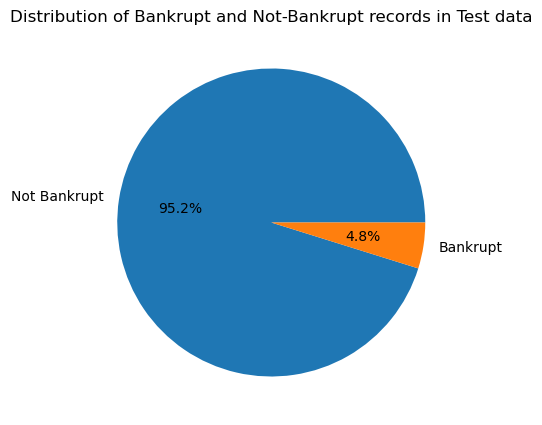

In [26]:
plt.figure(figsize = (7,5))
labels = ["Not Bankrupt", "Bankrupt"]
plt.pie(df['class'].value_counts().values,labels = labels, autopct='%.1f%%')
plt.title("Distribution of Bankrupt and Not-Bankrupt records in Test data")
plt.show()

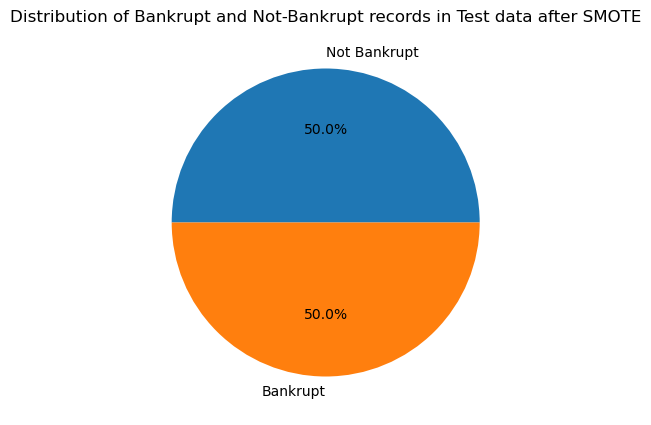

In [27]:
plt.figure(figsize = (7,5))
labels = ["Not Bankrupt", "Bankrupt"]
plt.pie(y_sm.value_counts().values,labels = labels, autopct='%.1f%%')
plt.title("Distribution of Bankrupt and Not-Bankrupt records in Test data after SMOTE")
plt.show()

In [28]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(x_sm,y_sm,test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((57839, 64), (24789, 64))

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.transform(X_test)

# Determine Mutual Information

In [30]:
from sklearn.feature_selection import mutual_info_classif

In [31]:
# calculate the mutual information between the variables and the target

# the smaller the value of the mi, the less information we can infer from
# the feature about the target

mi = mutual_info_classif(X_train_scale, y_train)
mi

array([0.06183535, 0.05756986, 0.04566948, 0.0487722 , 0.04682718,
       0.11007825, 0.05945227, 0.04690765, 0.07211197, 0.05801644,
       0.04920447, 0.06777423, 0.07954817, 0.05950411, 0.08978565,
       0.08955607, 0.0476929 , 0.05936254, 0.06511352, 0.00613116,
       0.1193656 , 0.0860825 , 0.06797563, 0.06857478, 0.06968407,
       0.08882217, 0.1682699 , 0.04327959, 0.02405444, 0.03726008,
       0.06528477, 0.03390398, 0.0201144 , 0.01917654, 0.07286457,
       0.01153137, 0.08188745, 0.06159253, 0.07951819, 0.02830293,
       0.08739635, 0.09418889, 0.01540206, 0.00988442, 0.05615235,
       0.06709875, 0.00769033, 0.0426036 , 0.03781054, 0.03646024,
       0.05736887, 0.02841026, 0.04113645, 0.05115627, 0.06682974,
       0.04046371, 0.03837934, 0.0739184 , 0.03247833, 0.00614164,
       0.01342013, 0.0478871 , 0.03278864, 0.01333369])

## Select top k features based on MI

In [32]:
from sklearn.feature_selection import SelectKBest

In [33]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Assuming you have already defined X_train_scale and y_train

# Select features
top_features = SelectKBest(mutual_info_classif, k=10)  # k = 10
sel_ = top_features.fit(X_train_scale, y_train)

# Get the indices of the selected features
selected_feature_indices = sel_.get_support(indices=True)

# Create a DataFrame with the selected columns
X_train_selected = pd.DataFrame(X_train_scale[:, selected_feature_indices], columns=X_train.columns[selected_feature_indices])

# X_train_selected now contains the 10 selected columns


In [34]:
X_train_selected

,Attr6,Attr15,Attr16,Attr21,Attr22,Attr26,Attr27,Attr37,Attr41,Attr42
0,0.040831,-0.035154,0.010383,-0.011163,0.001182,0.009938,0.020402,0.005408,-0.004501,0.012986
1,0.045310,0.022622,-0.000203,-0.012104,0.006863,-0.000965,-0.034576,-0.048193,-0.004313,0.014942
2,0.037086,-0.372810,-0.001489,0.010239,-0.008026,-0.002063,-0.034804,-0.029373,-0.006844,0.011303
3,0.063916,-0.438615,-0.001454,0.010147,-0.017268,-0.002195,-0.034733,-0.045975,-0.004152,0.011217
4,0.043173,0.013095,0.000003,-0.001597,0.010126,-0.000787,0.020368,-0.004503,-0.004371,0.015532
...,...,...,...,...,...,...,...,...,...,...
57834,0.021187,-0.029145,0.004490,-0.015598,0.019115,0.003898,-0.025234,0.001314,-0.004510,0.014600
57835,0.040831,-0.038655,0.028370,-0.013809,0.006992,0.026304,-0.033413,0.003272,-0.004557,0.014731
57836,0.040831,0.041808,-0.000452,-0.013856,0.011406,-0.001169,-0.034371,0.001672,-0.004233,0.014187
57837,0.040831,-0.036683,0.014512,-0.011929,0.052194,0.011160,-0.031813,0.002119,-0.004547,0.019954


In [35]:
X_train_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57839 entries, 0 to 57838
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr6   57839 non-null  float64
 1   Attr15  57839 non-null  float64
 2   Attr16  57839 non-null  float64
 3   Attr21  57839 non-null  float64
 4   Attr22  57839 non-null  float64
 5   Attr26  57839 non-null  float64
 6   Attr27  57839 non-null  float64
 7   Attr37  57839 non-null  float64
 8   Attr41  57839 non-null  float64
 9   Attr42  57839 non-null  float64
dtypes: float64(10)
memory usage: 4.4 MB


In [36]:
X_train_selected.columns

Index(['Attr6', 'Attr15', 'Attr16', 'Attr21', 'Attr22', 'Attr26', 'Attr27',
       'Attr37', 'Attr41', 'Attr42'],
      dtype='object')

In [37]:
import pandas as pd

# Assuming you have already defined X_test_scale

# Get the indices of the selected features
selected_feature_indices = sel_.get_support(indices=True)

# Create a DataFrame with the selected columns for X_test
X_test_selected = pd.DataFrame(X_test_scale[:, selected_feature_indices], columns=X_train.columns[selected_feature_indices])

# X_test_selected now contains the 10 selected columns from X_test_scale


## Models Based On MI Score

In [38]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
X_train_selected.columns

Index(['Attr6', 'Attr15', 'Attr16', 'Attr21', 'Attr22', 'Attr26', 'Attr27',
       'Attr37', 'Attr41', 'Attr42'],
      dtype='object')

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define a Support Vector Machine (SVM) Classifier with default hyperparameters
svm_model = SVC()

# Fit the model to the training data
svm_model.fit(X_train_selected, y_train)

# Predict using the trained SVM model
y_pred_svm = svm_model.predict(X_test_selected)

# Calculate and print accuracy
acc_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy: ", acc_svm)

# Print classification report for SVM
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))



SVM Accuracy:  0.6949453386582759
SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.86      0.74     12299
         1.0       0.80      0.53      0.64     12490

    accuracy                           0.69     24789
   macro avg       0.72      0.70      0.69     24789
weighted avg       0.72      0.69      0.69     24789



In [41]:
y_pred_svm

array([0., 1., 0., ..., 0., 1., 0.])

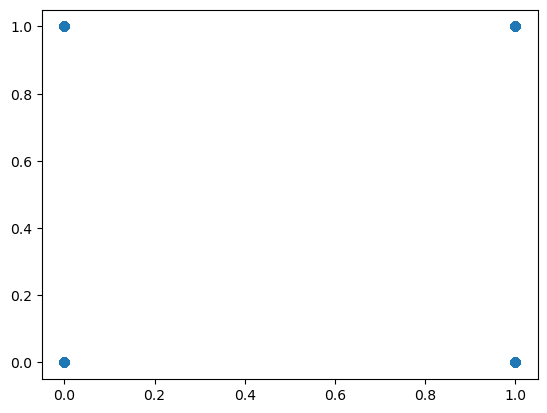

In [42]:
# plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_svm)

In [43]:
residuals = y_test - y_pred_svm

In [44]:
residuals

30461    0.0
76753    0.0
39319    0.0
57860    0.0
54702    0.0
        ... 
38035    0.0
78474    1.0
40664    0.0
9020    -1.0
24505    0.0
Name: class, Length: 24789, dtype: float64

In [49]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_svm)

In [50]:
score

-0.22029109099133937

In [52]:
import pickle

In [53]:
pickle.dump(svm_model,open('svm.pkl','wb'))

In [54]:
pickled_model = pickle.load(open('svm.pkl','rb'))

In [55]:
pickled_model

SVC()